In [1]:
import pandas as pd
df = pd.read_csv('churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [2]:
df.Churn.value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

<Axes: xlabel='Churn'>

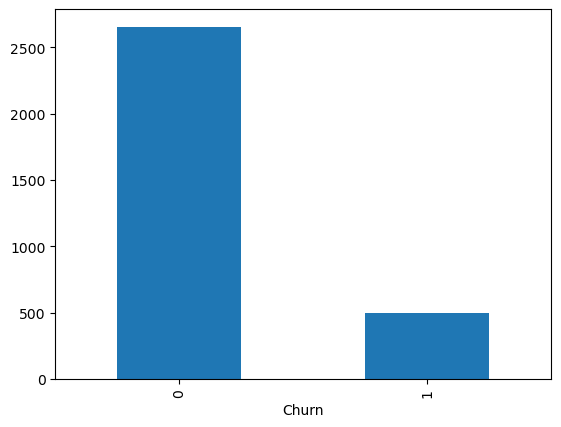

In [3]:
df.Churn.value_counts().plot(kind='bar')

In [4]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [5]:
X = df.drop('Churn', axis='columns')
y = df['Churn']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [8]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [9]:
y_preds = model.predict(X_test)

In [10]:
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       520
           1       0.72      0.40      0.51       110

    accuracy                           0.87       630
   macro avg       0.80      0.68      0.72       630
weighted avg       0.86      0.87      0.85       630



In [11]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_train_rus.value_counts()

Call  Failure  Complains  Subscription  Length  Charge  Amount  Seconds of Use  Frequency of use  Frequency of SMS  Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  Customer Value
0              0          35                    0               0               0                 0                 0                        2          1            2       25   0.000             6
                          37                    0               0               0                 0                 0                        2          1            2       25   0.000             5
                          34                    0               0               0                 0                 0                        2          1            2       25   0.000             3
5              0          38                    0               438             8                 7                 4                        3          1            2       30   45.840            3
               

In [13]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_rus, y_train_rus)
y_preds_rus = model.predict(X_test)
report = classification_report(y_test, y_preds_rus)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       520
           1       0.49      0.81      0.61       110

    accuracy                           0.82       630
   macro avg       0.72      0.82      0.75       630
weighted avg       0.87      0.82      0.84       630



/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote.value_counts()

Call  Failure  Complains  Subscription  Length  Charge  Amount  Seconds of Use  Frequency of use  Frequency of SMS  Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  Customer Value
0              0          35                    0               0               0                 0                 0                        2          1            2       25   0.000000          47
                          34                    0               0               0                 0                 0                        2          1            2       25   0.000000          25
                          37                    0               0               0                 0                 0                        2          1            2       25   0.000000          18
                          34                    0               0               0                 0                 0                        4          1            2       45   0.000000          15
           

In [15]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_smote, y_train_smote)
y_preds_smote = model.predict(X_test)
report = classification_report(y_test, y_preds_smote)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       520
           1       0.46      0.80      0.59       110

    accuracy                           0.80       630
   macro avg       0.71      0.80      0.73       630
weighted avg       0.86      0.80      0.82       630



/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from imblearn.combine import SMOTETomek

tomek = SMOTETomek(random_state=42)
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)
y_train_tomek.value_counts()

Churn
0    2108
1    2108
Name: count, dtype: int64

In [17]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tomek, y_train_tomek)
y_preds_tomek = model.predict(X_test)
report = classification_report(y_test, y_preds_tomek)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       520
           1       0.46      0.80      0.59       110

    accuracy                           0.80       630
   macro avg       0.71      0.80      0.73       630
weighted avg       0.86      0.80      0.82       630



/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
